In [7]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

In [2]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

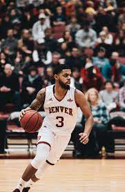

In [17]:
im = PILImage.create('basketball.jpg')
im.thumbnail((192,192))
im

In [9]:
#|export
learn = load_learner('model.pkl')

In [18]:
learn.predict(im)

('basketball', tensor(1), tensor([0.0260, 0.9702, 0.0038]))

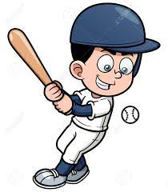

In [32]:
im2 = PILImage.create('baseball.jpg')
im2.thumbnail((192,192))
im2

In [33]:
learn.predict(im2)

('baseball', tensor(0), tensor([9.8405e-01, 1.5928e-02, 2.4301e-05]))

In [13]:
?? learn.predict

In [14]:
learn.predict(im)

('baseball', tensor(0), tensor([0.5576, 0.4335, 0.0089]))

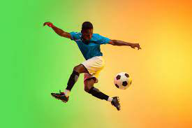

In [15]:
im3 = PILImage.create('soccer.jpg')
im3.thumbnail((192,192))
im3

In [16]:
learn.predict(im3)

('soccer', tensor(2), tensor([1.5468e-05, 2.0146e-04, 9.9978e-01]))

In [30]:
#|export
categories = ('Baseball', 'Basketball', 'Soccer')

def classify_images(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [34]:
classify_images(im2)

{'Baseball': 0.9840480089187622,
 'Basketball': 0.01592763513326645,
 'Soccer': 2.4300976292579435e-05}

In [35]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['basketball.jpg', 'baseball.jpg', 'soccer.jpg']

intf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\Zahaak\AppData\Local\Temp\ipykernel_14600\2195985914.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
C:\Users\Zahaak\AppData\Local\Temp\ipykernel_14600\2195985914.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
C:\Users\Zahaak\AppData\Local\Temp\ipykernel_14600\2195985914.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
C:\Users\Zahaak\AppData\Local\Temp\ipykernel_14600\2195985914.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [37]:
# need to turn it into a python script
m = learn.model
ps = list(m.parameters())

In [38]:
ps[1]

Parameter containing:
tensor([3.0151e-01, 2.6829e-01, 2.6057e-01, 3.1059e-01, 2.3869e-01, 3.2967e-01,
        2.7469e-01, 3.8248e-01, 3.9390e-01, 4.1409e-01, 2.7098e-01, 3.1149e-01,
        4.1615e-01, 2.5479e-01, 2.4423e-01, 1.1412e-06, 1.5042e-06, 2.6503e-01,
        3.1174e-01, 4.1443e-01, 3.1118e-01, 2.8567e-01, 2.6003e-01, 5.6955e-01,
        3.3120e-01, 1.4590e-01, 2.9311e-01, 3.3709e-01, 3.2966e-01, 2.7244e-01,
        3.4232e-01, 3.7674e-04, 2.6176e-01, 3.3531e-01, 6.1340e-02, 3.4426e-06,
        3.8337e-01, 2.8995e-01, 3.2105e-01, 3.1180e-01, 2.6361e-01, 6.6502e-08,
        3.1662e-01, 2.2040e-01, 3.1826e-01, 4.4057e-01, 1.3414e-06, 2.8622e-05,
        5.3461e-01, 2.9142e-06, 5.8679e-01, 2.0813e-01, 3.0725e-01, 3.0700e-01,
        2.7181e-01, 3.3234e-01, 3.1778e-01, 8.0925e-05, 3.0810e-01, 1.9802e-01,
        1.6535e-01, 2.6384e-01, 3.5230e-01, 3.9389e-08], requires_grad=True)

In [39]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [40]:
ps[0]

Parameter containing:
tensor([[[[ 5.3830e-03, -6.9353e-03,  7.8571e-03,  ...,  4.9052e-02,
            3.0635e-02,  2.5377e-02],
          [ 4.1064e-02,  3.1283e-02,  3.2249e-02,  ...,  3.3133e-02,
            2.9735e-02,  4.1717e-02],
          [ 4.9356e-03, -3.1723e-02, -6.1326e-02,  ..., -9.7511e-02,
           -1.1604e-01, -1.2194e-01],
          ...,
          [-1.2309e-02, -2.4864e-02, -9.3278e-03,  ...,  1.7092e-02,
            2.4334e-03,  1.6691e-02],
          [ 3.8843e-03,  4.4267e-03,  3.6289e-02,  ...,  1.0369e-01,
            7.3941e-02,  5.9052e-02],
          [ 1.6753e-02,  8.8613e-03,  3.1284e-02,  ...,  9.6944e-02,
            8.3724e-02,  9.6941e-02]],

         [[-7.7295e-03, -8.7785e-03,  1.4140e-02,  ...,  3.3901e-02,
            2.5481e-02,  2.4274e-02],
          [ 5.3955e-02,  4.4672e-02,  3.4321e-02,  ...,  1.3389e-02,
            1.9126e-02,  3.7982e-02],
          [ 1.0202e-03, -5.4517e-02, -1.0225e-01,  ..., -1.9232e-01,
           -1.9996e-01, -1.8194e-01]

In [45]:
pip install nbdev

     ---------------------------------------- 64.8/64.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 58.7/58.7 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
#|export
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful
